# Figure 2

In [1]:
import os
import anndata as ad
import scanpy as sc
import spatialdata
import spatialdata_plot
import scportrait
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_hex

# Create a continuous colormap from defined colors
color_list =  ['#2F559A', '#5AADC5', '#F5DB12', '#E46425', '#B3262A']
custom_cmap = LinearSegmentedColormap.from_list('custom_gradient', color_list)

def generate_palette(n_colors, custom_cmap):
    palette = [custom_cmap(i / (n_colors - 1)) for i in range(n_colors)]

    # convert to hex colors 
    palette = [to_hex(x) for x in palette]
    return(palette)

color_list_blue = ['#FFFFFF','#2F559A']
custom_cmap_blue = LinearSegmentedColormap.from_list('custom_gradient', color_list_blue)


/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
# define plotting parameters for consistency across figures and vector graphic export
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

In [3]:
sdata_file_path = "../figure_data/input_data_Xenium/scportrait.sdata"
anndata_file_all_results = '../figure_data/input_data_Xenium/xenium_ovarian_cancer_full.h5ad'
h5sc_path = '../figure_data/input_data_Xenium/single_cells.h5sc'
figures_directory = "../manuscript_figures/Figure_2/"
os.makedirs(figures_directory, exist_ok=True)

In [4]:
# load required input data
data = ad.read_h5ad(anndata_file_all_results)
sdata = spatialdata.read_zarr(sdata_file_path)
h5sc = scportrait.io.read_h5sc(h5sc_path)
px_size = 0.2125 #µm -> input_image is transformed with identifiy matrix, HE image has a different resolution but when plotting with spatialdata we still need to use the resolution from the input_image as the transformed HE image is plotted which has the same resolution

version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04


In [5]:
# select a region for close-up visualization
center_x = 40300
center_y = 21650
max_width = 800

sdata_select = scportrait.tl.sdata.processing.get_bounding_box_sdata(sdata, 
                                                                     center_x = center_x, 
                                                                     center_y = center_y, 
                                                                     max_width = max_width, 
                                                                     drop_points=False)

/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/functools.py:909: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


## Fig 2a H&E overview of tissue region

INFO     Rasterizing image for faster rendering.                                                                   


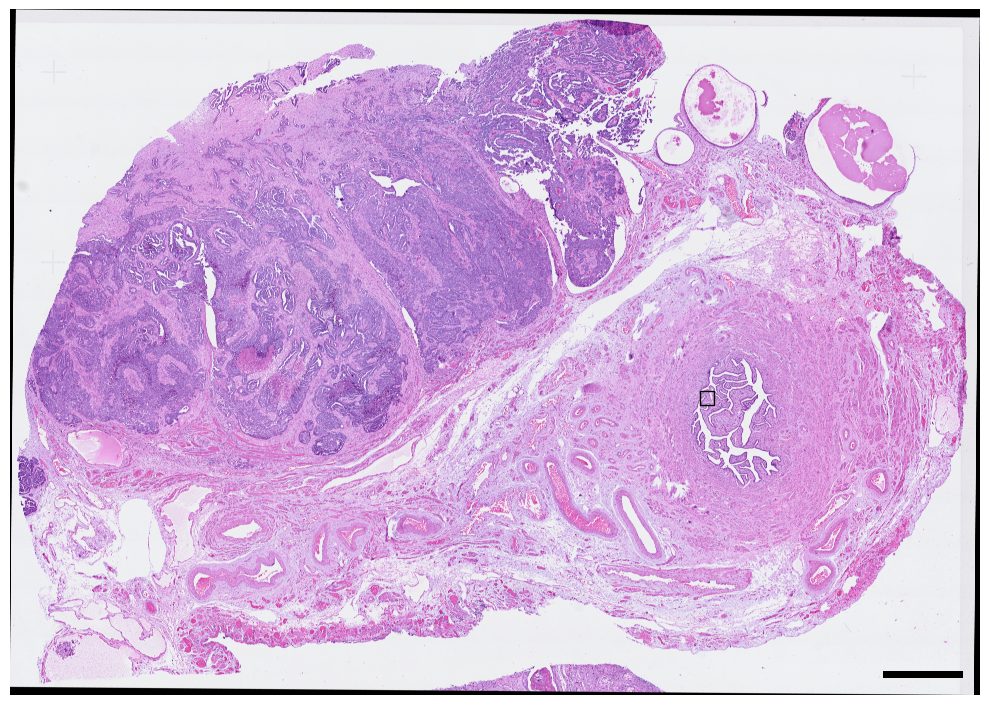

In [6]:
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
sdata.pl.render_images("he_image").pl.show(ax = axs)
scportrait.pl.add_scalebar(axs, resolution  = px_size, scale_loc = "none", border_pad = 1, color = "black", fixed_length = 1000)
axs.axis("off")
axs.set_title(None)

# add rectangle indicating where the selected region is located
bb_xmin = center_x - max_width // 2
bb_ymin = center_y - max_width // 2
bb_w, bb_h = max_width, max_width
rect = mpl.patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=1, edgecolor="black", facecolor="none")
axs.add_patch(rect)

fig.tight_layout()
fig.savefig(f"{figures_directory}/Fig2a.pdf", bbox_inches = "tight")

## Fig 2b close up of H&E, transcripts and fluorescent stains from a selected tissue area

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.18720492118416].


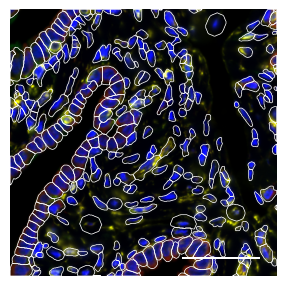

/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/1882969580.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [7]:
channels = ['DAPI', 'ATP1A1/CD45/E-Cadherin', '18S', 'AlphaSMA/Vimentin']
colors = ["blue", "green", "red", "yellow",]

fig, axs = scportrait.pl.sdata._create_figure_dpi(max_width, max_width, dpi = 300)
sdata_select.pl.render_images("input_image", channel = channels, palette = colors).pl.show(ax = axs, colorbar = False)
scportrait.pl.add_scalebar(axs, resolution  = px_size, scale_loc = "none", border_pad = 1, color = "white", fixed_length = 50)

scportrait.pl.sdata.plot_segmentation_mask(sdata_select, masks = ["seg_all_cytosol"], line_width = 0.5, background_image=None, ax = axs)
axs.axis("off")
axs.set_title(None)

fig.tight_layout()
fig.savefig(f"{figures_directory}/Fig2b_panel1_h&e.pdf", bbox_inches = "tight")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003937008..1.0].


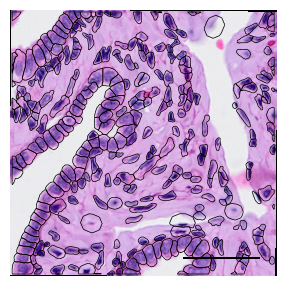

/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/2588320551.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [8]:
fig, axs = scportrait.pl.sdata._create_figure_dpi(max_width, max_width, dpi = 300)
sdata_select.pl.render_images("he_image").pl.show(ax = axs, colorbar = False)
scportrait.pl.add_scalebar(axs, resolution  = px_size, scale_loc = "none", border_pad = 1, color = "black", fixed_length = 50)
scportrait.pl.sdata.plot_segmentation_mask(sdata_select, masks = ["seg_all_cytosol"], background_image=None, ax = axs, line_color="black", line_width = 0.5)
axs.axis("off")
axs.set_title(None)

fig.tight_layout()
fig.savefig(f"{figures_directory}/Fig2b_panel2_transcripts.pdf", bbox_inches = "tight")

/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


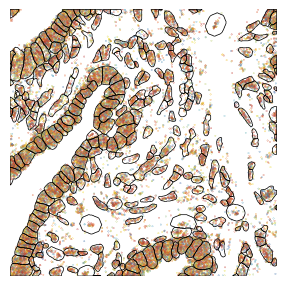

/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/1678724853.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [9]:
# remap gene annotation for individual transcripts to a numeric value for plotting with a continous colormap
import random
random.seed(42)  # Set seed for reproducibility

# assign a unique number to each feature_name
unique_features = sdata_select["transcripts"]['feature_name'].compute().unique()
random.shuffle(unique_features)
color_map = {feature: i for i, feature in enumerate(unique_features)}
colors = sdata_select["transcripts"]['feature_name'].map(color_map)

# save results back to sdata object
sdata_select["transcripts"]["colors"] = colors

fig, axs = scportrait.pl.sdata._create_figure_dpi(max_width, max_width, dpi = 300)
sdata_select.pl.render_points("transcripts", method = "matplotlib", color= "colors", size = 0.01, cmap = custom_cmap).pl.show(ax = axs, colorbar = False)
scportrait.pl.sdata.plot_segmentation_mask(sdata_select, masks = ["seg_all_cytosol"], background_image=None, ax = axs, line_color="black", line_width = 0.5)
scportrait.pl.add_scalebar(axs, resolution  = px_size, scale_loc = "none", border_pad = 1, color = "black", fixed_length = 50)
axs.axis("off")
axs.set_title(None)
fig.tight_layout()
fig.savefig(f"{figures_directory}/Fig2b_panel3_fluorescent_stains.pdf", bbox_inches = "tight")

## Fig 2c

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


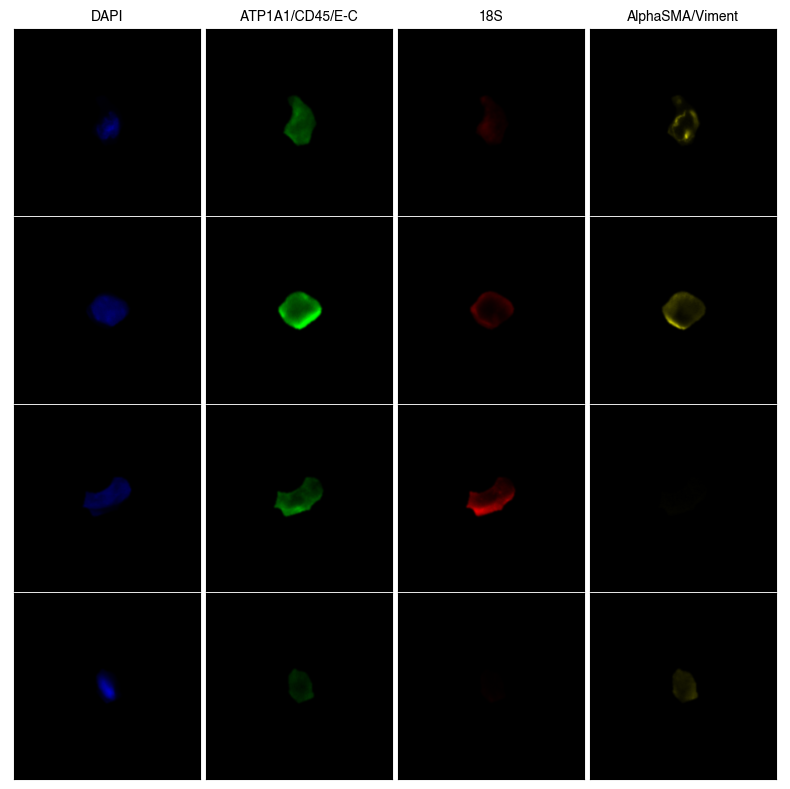

In [10]:
cell_ids = [120235, 51790, 163666, 301540]
channels = [1, 2, 3, 4]
images = scportrait.tl.h5sc.get_image_with_cellid(h5sc, cell_id = cell_ids, select_channel=channels)
single_cell_size = 2
colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 1, 0)]

# generate colorized images
colorized = np.zeros((len(images), len(channels), images.shape[-1], images.shape[-1], 3), dtype="float64")
for i, img in enumerate(images):
    for ix, _ in enumerate(img):
        colorized[i][ix] = scportrait.pl.vis.colorize(img[ix], color=colors[ix])

# resize array to have proper shape for plotting
input_images = colorized.reshape(len(cell_ids) * len(channels), images.shape[-1], images.shape[-1], 3)

# plot in a grid
fig, axs = plt.subplots(1, 1, figsize=(len(channels)*single_cell_size, len(cell_ids)*single_cell_size))

scportrait.pl.h5sc._plot_image_grid(
    axs,
    input_images,
    ncols=len(channels),
    nrows=len(cell_ids),
    col_labels = h5sc.var["channels"].iloc[channels].tolist()
    
)
fig.tight_layout()
fig.savefig(f"{figures_directory}/Fig2c_single_cell_images_single_channel.pdf", bbox_inches = "tight")

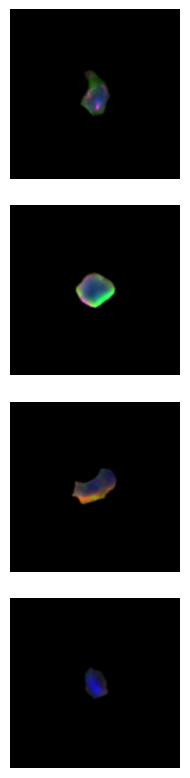

In [11]:
cell_ids = [120235, 51790, 163666, 301540]
channels = [1, 2, 3, 4]
images = scportrait.tl.h5sc.get_image_with_cellid(h5sc, cell_id = cell_ids, select_channel=channels)

fig_width = 1 * single_cell_size
fig_height = len(cell_ids) * single_cell_size
fig, ax = plt.subplots(4, 1, figsize=(fig_width, fig_height))
for _i, img in enumerate(images):
    ax[_i].imshow(scportrait.pl.vis.generate_composite(img))
    ax[_i].axis("off")

fig.tight_layout()
fig.savefig(f"{figures_directory}/Fig2c_single_cell_images_merged_channels.pdf", bbox_inches = "tight")

## Fig 2d schematic overview of VitMAE training paradigm

illustrative sketch, no data shown

## Fig 2e Generate tSNE Xenium All Cell Types

### tSNE of all cell types

In [13]:
# select required features from the anndata object to perform dimensionality reduction on
plot_data = ad.AnnData(
    X=data.obsm['X_vitmae_finetuned_img_features'],
    obs=data.obs,
)

In [14]:
# using single-cell rapids to calculate TSNE and UMAP embeddings requires a CUDA-enabled Nvidia GPU
# check for Nvidia GPU and configure for use with GPU accelerated rapids single-cell
import torch
if torch.cuda.is_available():
    print("GPU is available. Proceeding with GPU-accelerated computations.")
    
    # import packages for GPU-accelerated analysis
    import rmm
    import cupy as cp
    import rapids_singlecell as rsc
    from cuml.manifold import TSNE
    
    from rmm.allocators.cupy import rmm_cupy_allocator

    # initialize RAPIDS memory manager
    rmm.reinitialize(
        pool_allocator=True,
        initial_pool_size=2 << 30,  # 2GB
        devices=list(map(int, os.environ.get("CUDA_VISIBLE_DEVICES").split(","))),
    )
    cp.cuda.set_allocator(rmm_cupy_allocator)

    # scale data
    sc.pp.scale(plot_data)

    # move data to GPU
    rsc.get.anndata_to_GPU(plot_data)

    # calculate PCs
    rsc.pp.pca(plot_data, n_comps=100)

    # calculate tSNE embedding
    rsc.tl.tsne(
        plot_data,
        n_pcs=100,
        perplexity=30,
        early_exaggeration=12,
        learning_rate=200,
    )

    # save results to file for reloading
    pd.DataFrame(
        {
            'cell_id': plot_data.obs['cell_id'],
            'cell_label': plot_data.obs['cell_labels'],
            '10X_cell_type': plot_data.obs['10X_cell_type'],
            'tsne_x': plot_data.obsm['X_tsne'][:,0],
            'tsne_y': plot_data.obsm['X_tsne'][:,1],
        }
    ).to_csv('../figure_data/input_data_Xenium/all_cells_tsne_coordinates.csv', index=False)
else:
    print("GPU is not available. Skipping GPU-accelerated computations and loading precomputed results.")
    tsne_coordinates = pd.read_csv('../figure_data/input_data_Xenium/all_cells_tsne_coordinates.csv')
    tsne_coordinates.set_index('cell_id', inplace=True)

    # add tsne coordinates to the anndata object for plotting
    cell_ids = plot_data.obs.cell_id.tolist()
    plot_data.obsm["X_tsne"] = tsne_coordinates.loc[cell_ids].get(['tsne_x', 'tsne_y']).to_numpy()

GPU is not available. Skipping GPU-accelerated computations and loading precomputed results.


In [15]:
# define order of cell types for consistent plotting
order = [
    'Tumor Cells',
    'Tumor Associated Endothelial Cells',
    'Pericytes',
    'SOX2-OT+ Tumor Cells',
    'Fallopian Tube Epithelium',
    'Smooth Muscle Cells',
    'Tumor Associated Fibroblasts',
    'Inflammatory Tumor Cells',
    'Macrophages',
    'Malignant Cells Lining Cyst',
    'T and NK Cells',
    'Ciliated Epithelial Cells',
    'Stromal Associated Fibroblasts',
    'Granulosa Cells',
    'Proliferative Tumor Cells',
    'Stromal Associated Endothelial Cells',
    'VEGFA+ Tumor Cells',
]

# create custom color palette for cell types
n_colors = len(order)
palette = generate_palette(n_colors, custom_cmap)


In [16]:
# visualize the color palette for annotations in Illustrator
fig, ax = plt.subplots(figsize=(n_colors, 1))
for i, color in enumerate(palette):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, n_colors)
ax.set_ylim(0, 1)
ax.axis('off')
plt.savefig(f'{figures_directory}/Fig2e_color_palette_{n_colors}_colors.pdf', bbox_inches='tight')
plt.close()

In [17]:
# add cluster colors to the anndata object for plotting
cluster_to_color = {cluster_label:palette[i] for i, cluster_label in enumerate(order)}
na_color = "#FFFFFF" #white 

cats = list(plot_data.obs['10X_cell_type'].cat.categories)
plot_data.uns['10X_cell_type_colors'] = [cluster_to_color.get(c, na_color) for c in cats]

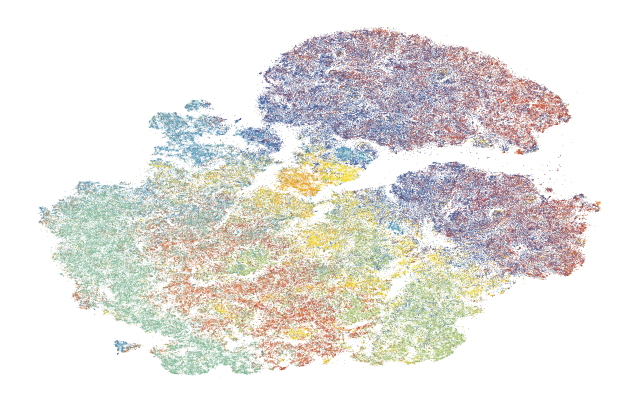

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

sc.pl.tsne(
    plot_data[plot_data.obs['10X_cell_type'] != 'Unassigned'],
    color = '10X_cell_type',
    ax = ax,
    s = 0.5,
    alpha = 1,
    frameon=False,
    title='',
    legend_loc=None,
)
fig.savefig(f'{figures_directory}/Fig2e_tsne_coordinates.png', dpi=600, bbox_inches='tight',)

### Annotate different tSNE regions with single-cell images

In [19]:
# load data that is to be annotated
data_plot = pd.read_csv('../figure_data/input_data_Xenium/all_cells_tsne_coordinates.csv')
data_plot.columns = ["cell_id", "scportrait_cell_id", "10X_cell_type", "tsne_x", "tsne_y"]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


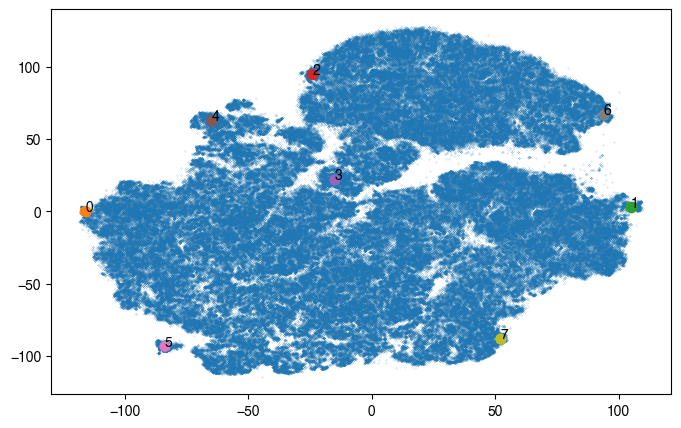

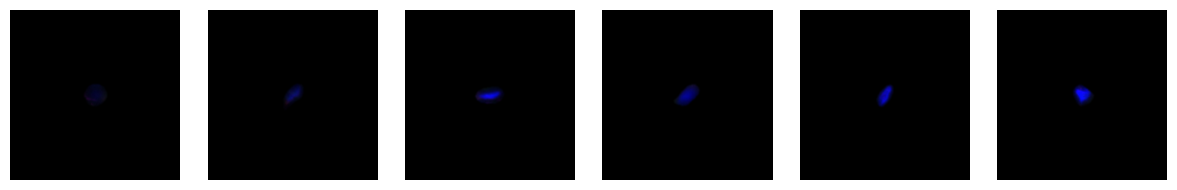

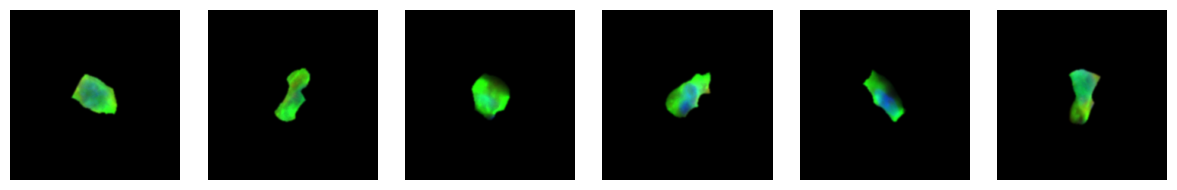

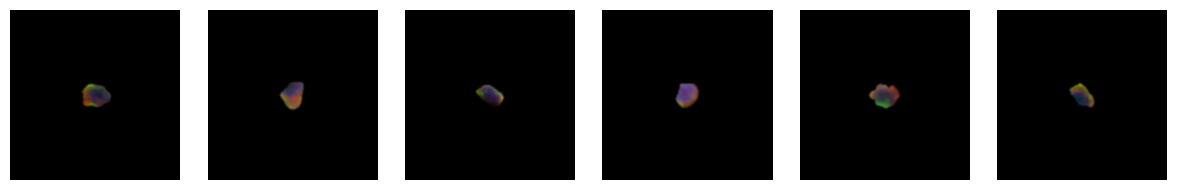

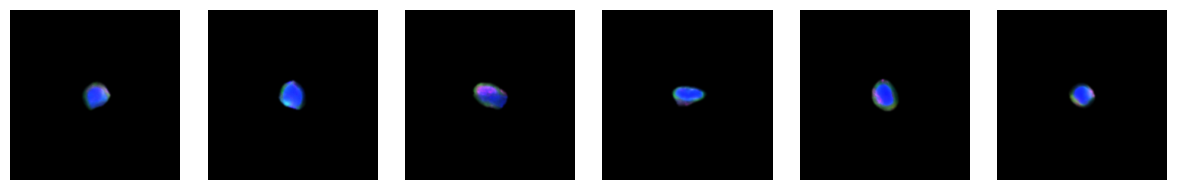

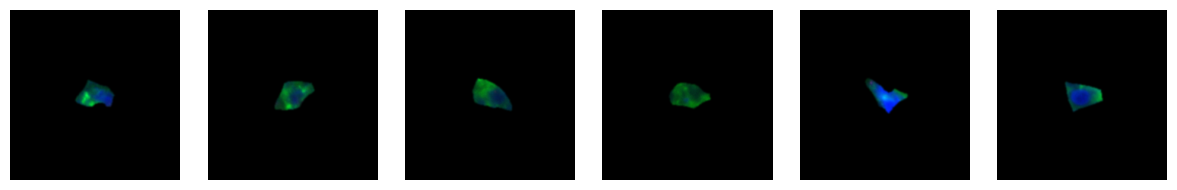

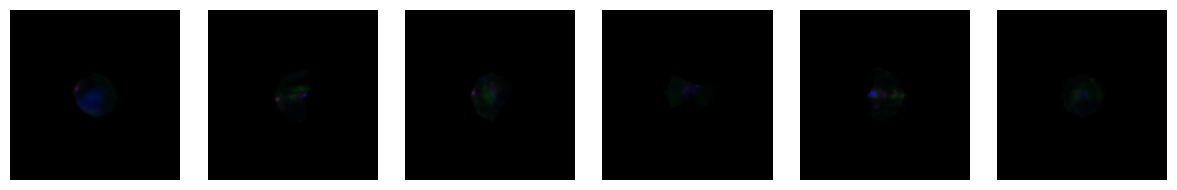

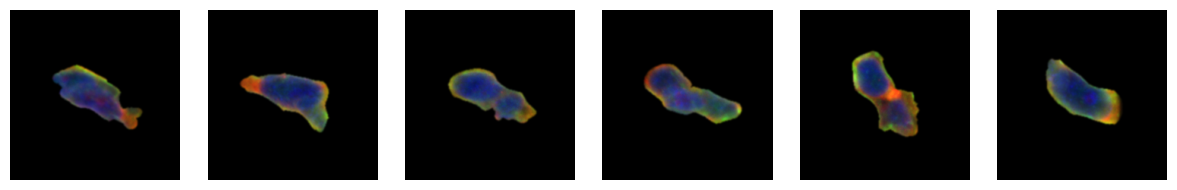

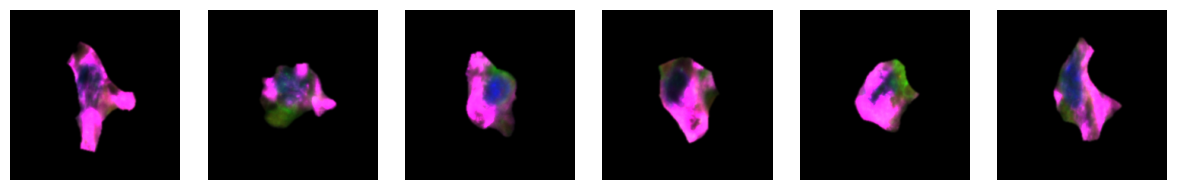

In [20]:
centers = [
           [-116, 0],
           [105, 3], 
           [-24, 95], 
           [-15, 22], 
           [-65, 63], 
           [-84, -93],
           [94, 67], 
           [52, -88]
          ]

n_cells = 6
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data_plot.tsne_x, data_plot.tsne_y, s = 0.01, rasterized = True)

coords = data_plot[["tsne_x", "tsne_y"]].to_numpy()
for _id, centers in enumerate(centers):
 
    x, y = centers
        
    distances = np.linalg.norm(coords - np.array([x, y]), axis=1)
    distances = pd.DataFrame({"distance":distances, 
                              "scportrait_cell_id":data_plot.scportrait_cell_id, 
                              "x":data_plot.tsne_x, 
                              "y":data_plot.tsne_y}).sort_values("distance")
    
    select_cells = distances.head(n_cells)

    ax.scatter(select_cells.x, select_cells.y, label = _id)
    ax.text(x, y, _id)

    # get single cell images for selected cells
    cell_ids = select_cells.scportrait_cell_id
    channels = [1, 2, 3, 4]
    images = scportrait.tl.h5sc.get_image_with_cellid(h5sc, cell_id = cell_ids, select_channel = channels)

    fig_height = 1 * single_cell_size
    fig_width = n_cells * single_cell_size

    _fig, _ax = plt.subplots(1, n_cells, figsize=(fig_width, fig_height))
    for _i, img in enumerate(images):
        _ax[_i].imshow(scportrait.pl.vis.generate_composite(img))
        _ax[_i].axis("off")

    _fig.tight_layout()
    _fig.savefig(f"{figures_directory}/Fig2e_tmp_single_cell_images_leiden_point{_id}.pdf", bbox_inches = "tight")
    
fig.savefig(f"{figures_directory}/Fig2e_single_cell_cluster_location_to_visualize.pdf", bbox_inches = "tight")

## Fig 2f Macrophages

In [21]:
# select required features from the anndata object to perform dimensionality reduction on
plot_macs = plot_data[plot_data.obs['10X_cell_type'] == 'Macrophages'].copy()

In [22]:
# using single-cell rapids to calculate TSNE and UMAP embeddings requires a CUDA-enabled Nvidia GPU
# check for Nvidia GPU and configure for use with GPU accelerated rapids single-cell

import torch
if torch.cuda.is_available():
    print("GPU is available. Proceeding with GPU-accelerated computations.")
    
    rsc.pp.scale(plot_macs)
    rsc.pp.neighbors(plot_macs, n_neighbors=5, use_rep='X')
    rsc.tl.leiden(plot_macs, resolution=0.8, key_added='vitmae_leiden_macs')

    # Convert Leiden cluster names to 1-based index
    plot_macs.obs['vitmae_leiden_macs'] = plot_macs.obs['vitmae_leiden_macs'].astype(int).add(1).astype(str).astype('category')

    # merge with main anndata object
    merged_obs = plot_data.obs.merge(
        plot_macs.obs[['cell_id', 'vitmae_leiden_macs']],
        right_on='cell_id',
        left_on='cell_id',
        how='left'
    )
    plot_data.obs = merged_obs

    # save results to file for reloading
    plot_data.obs[['cell_id', 'vitmae_leiden_macs']].to_csv('../figure_data/input_data_Xenium/macrophage_image_leiden.csv', index=False)

else:
    print("GPU is not available. Skipping GPU-accelerated computations and loading precomputed results.")
    vitmae_leiden_macs = pd.read_csv('../figure_data/input_data_Xenium/macrophage_image_leiden.csv')
    vitmae_leiden_macs["vitmae_leiden_macs"] = vitmae_leiden_macs["vitmae_leiden_macs"].fillna(-1).astype(int)
    

    # add tsne coordinates to the anndata object for plotting
    plot_data.obs['vitmae_leiden_macs'] = vitmae_leiden_macs['vitmae_leiden_macs'].values
    plot_data.obs['vitmae_leiden_macs'] = plot_data.obs['vitmae_leiden_macs'].astype(str).astype('category')
    plot_data.obs["vitmae_leiden_macs"].replace('-1', np.nan, inplace=True)
    plot_data.obs["vitmae_leiden_macs"] = plot_data.obs["vitmae_leiden_macs"].cat.remove_unused_categories()

GPU is not available. Skipping GPU-accelerated computations and loading precomputed results.


/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/2563624323.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  plot_data.obs["vitmae_leiden_macs"].replace('-1', np.nan, inplace=True)
/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/2563624323.py:36: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categorie

In [23]:
groups_to_plot = ['11', '4', '12', '8', '9', '13', '1', '10']

# create custom color palette for cell types
n_colors = len(groups_to_plot)
palette = generate_palette(n_colors, custom_cmap)

In [24]:
# visualize the color palette for annotations in Illustrator
fig, ax = plt.subplots(figsize=(n_colors, 1))
for i, color in enumerate(palette):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, n_colors)
ax.set_ylim(0, 1)
ax.axis('off')
plt.savefig(f'{figures_directory}/Fig2f_color_palette_{n_colors}_colors.pdf', bbox_inches='tight')
plt.close()

In [26]:
groups_to_plot = ['11', '4', '12', '8', '9', '13', '1', '10']

In [27]:
cluster_to_color = {cluster_label:palette[i] for i, cluster_label in enumerate(groups_to_plot)}
na_color = "#FFFFFF" #white 

# dump to json file for reloading
with open(f'../figure_data/colormaps/Fig2f_cluster_to_color.json', 'w') as f:
    json.dump(cluster_to_color, f)

cats = list(plot_data.obs['vitmae_leiden_macs'].cat.categories)
plot_data.uns['vitmae_leiden_macs_colors'] = [cluster_to_color.get(c, na_color) for c in cats]

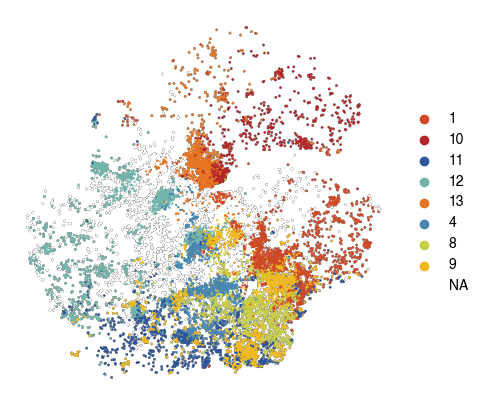

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

sc.pl.tsne(
    plot_data[plot_data.obs['10X_cell_type'] == 'Macrophages'],
    color = 'vitmae_leiden_macs',
    ax = ax,
    s = 10,
    alpha = 1,
    add_outline = True,
    outline_width = (0.1,0),
    frameon=False,
    title='',
    na_color='white',
    groups=groups_to_plot,
    # legend_loc=None,
)
fig.savefig(f'{figures_directory}/Fig_2f.png', dpi=600, bbox_inches='tight',)

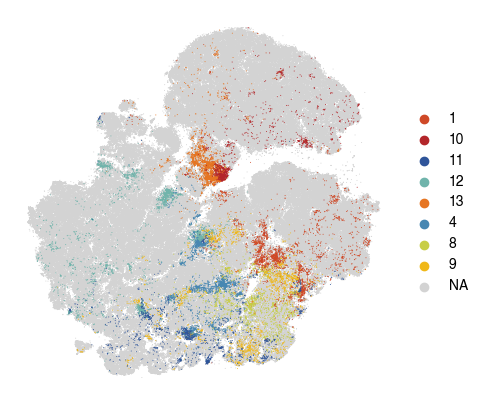

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))

sc.pl.tsne(
    plot_data,
    color = 'vitmae_leiden_macs',
    ax = ax,
    s = 2,
    alpha = 1,
    frameon=False,
    title='',
    na_color='lightgrey',
    groups=groups_to_plot,
)

/fs/home/schmacke/miniforge3/envs/rapids/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1148: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=palette[label], label=label)


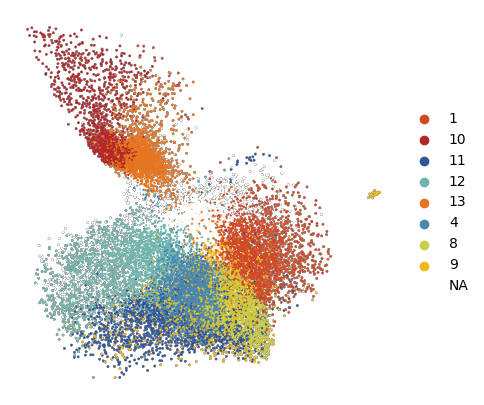

In [ ]:
# do the same visualization but with UMAP instead
rsc.pp.neighbors(plot_data, n_neighbors=15)
rsc.tl.umap(plot_data)

fig, ax = plt.subplots(figsize=(5, 5))

sc.pl.umap(
    plot_data[plot_data.obs['10X_cell_type'] == 'Macrophages'],
    color = 'vitmae_leiden_macs',
    ax = ax,
    s = 10,
    alpha = 1,
    add_outline = True,
    outline_width = (0.1,0),
    frameon=False,
    title='',
    na_color='white',
    groups=groups_to_plot,
)

In [31]:
# write out results for reloading
macs_clusters = plot_data.obs[plot_data.obs['10X_cell_type'] == 'Macrophages'][['cell_id','vitmae_leiden_macs']].copy()
macs_clusters['Has_DE_Genes'] = macs_clusters['vitmae_leiden_macs'].isin(groups_to_plot)
macs_clusters.to_csv(f'../figure_data/input_data_Xenium/macs_clusters.csv', index=False)

## Fig 2g Visualize macrophage cells from different leiden clusters generated on the image space

note: only the clusters which showed DE gene expression were shown in the figure, i.e. clusters '11', '4', '12', '8', '9', '13', '1', '10'

In [32]:
path_tsne_coordinates = '../figure_data/input_data_Xenium/all_cells_tsne_coordinates.csv'
path_macrophage_leiden_cluster_annotation = '../figure_data/input_data_Xenium/macs_clusters.csv'

In [33]:
# load macrophage cluster annotation includes tsne x-y coordinates
annotation_macrophages = pd.read_csv(path_macrophage_leiden_cluster_annotation)
tsne_coordinates = pd.read_csv(path_tsne_coordinates)
tsne_coordinates.columns = ["cell_id", "scportrait_cell_id", "10X_cell_type", "tsne_x", "tsne_y"]
annotation_macrophages = tsne_coordinates.merge(annotation_macrophages, on = "cell_id", how = "right")
annotation_macrophages["vitmae_leiden_macs"] = annotation_macrophages["vitmae_leiden_macs"].astype("str").astype("category")

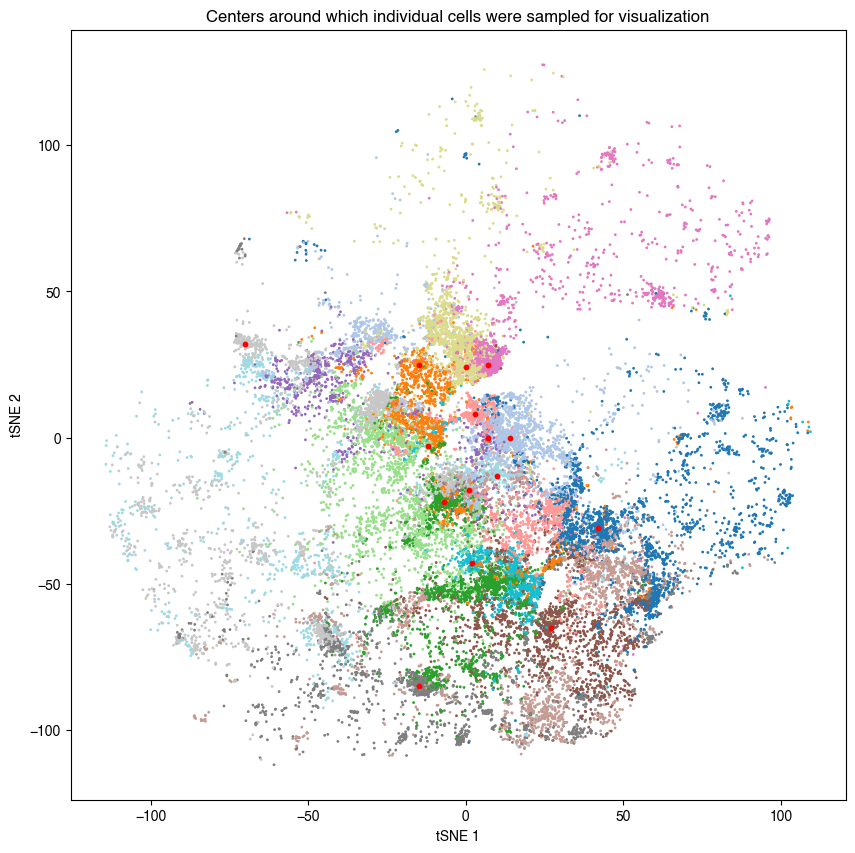

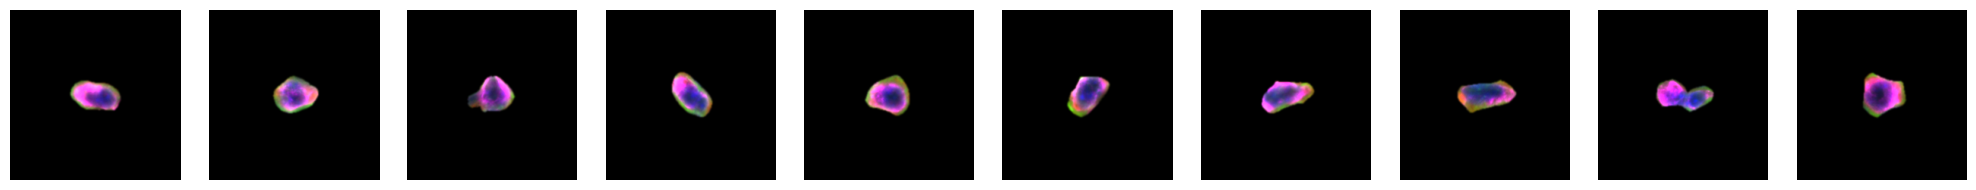

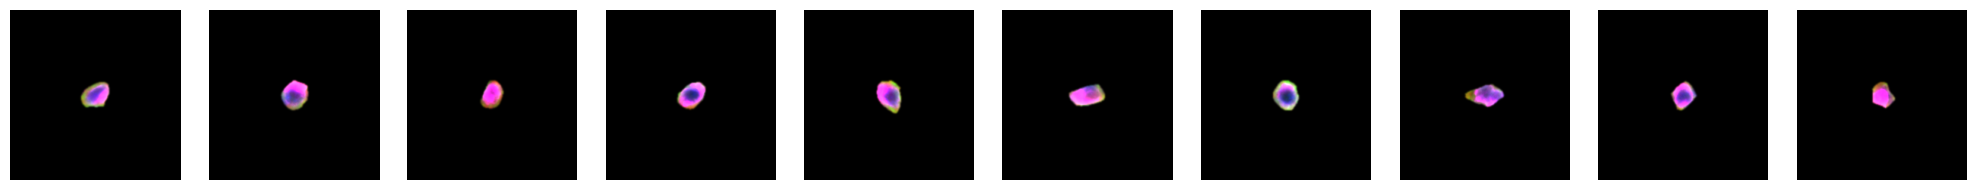

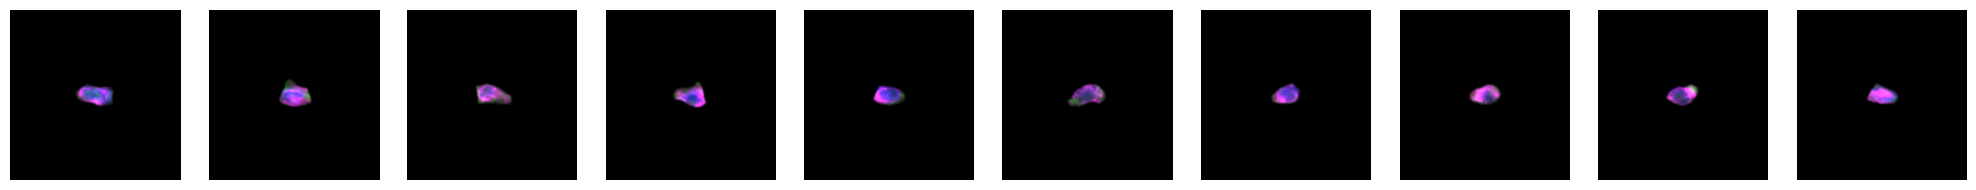

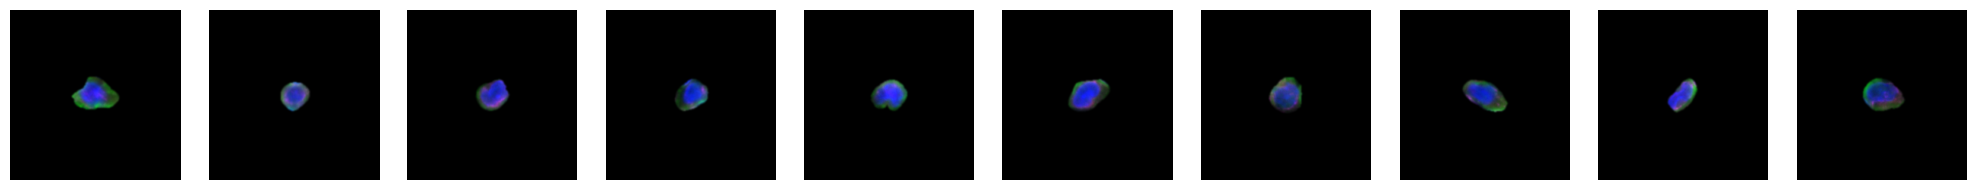

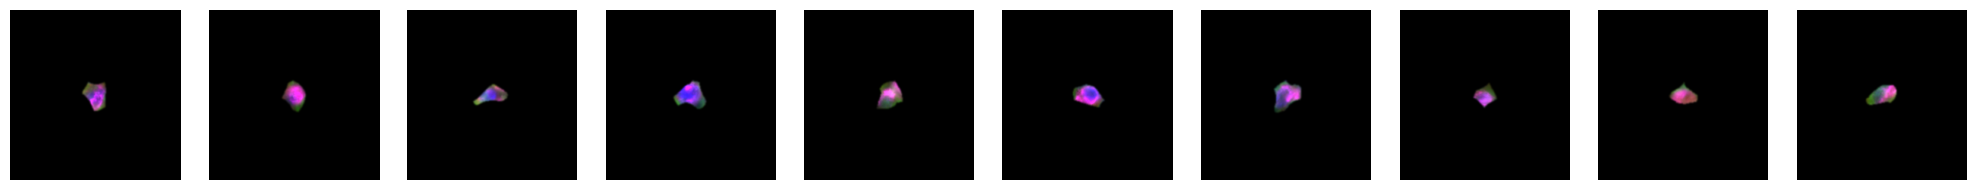

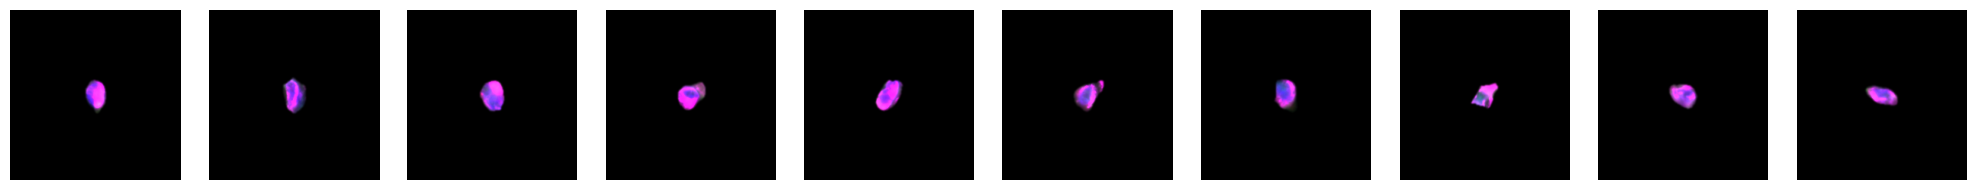

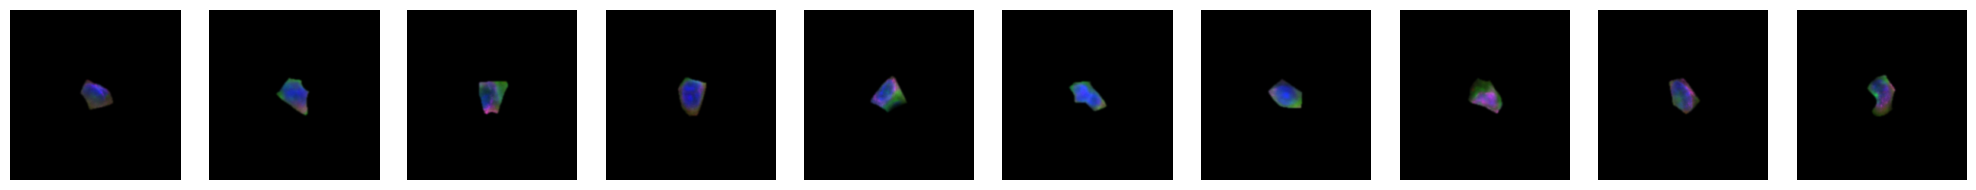

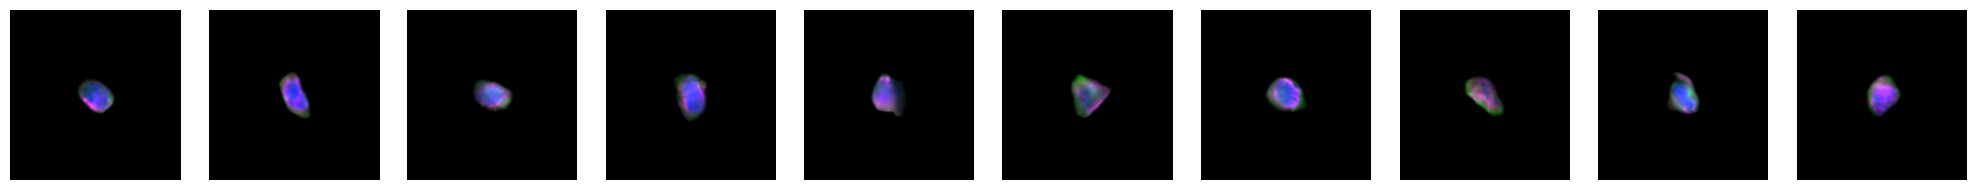

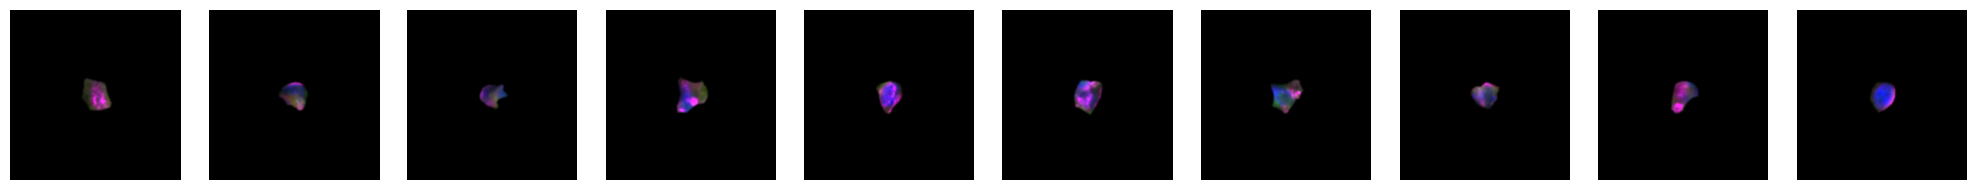

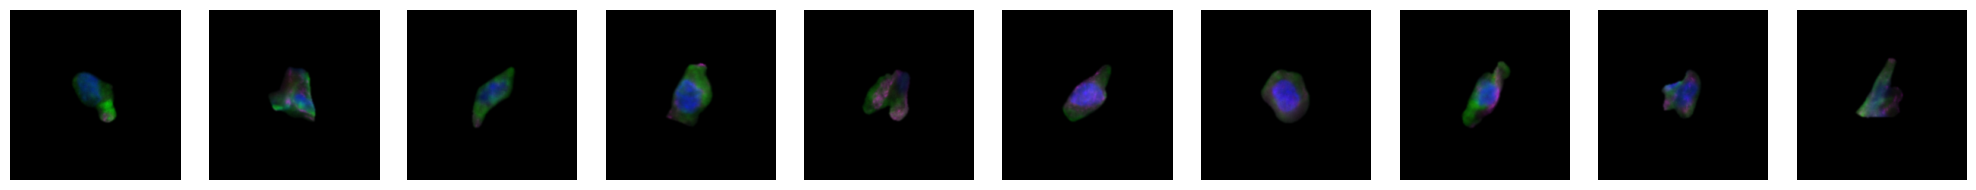

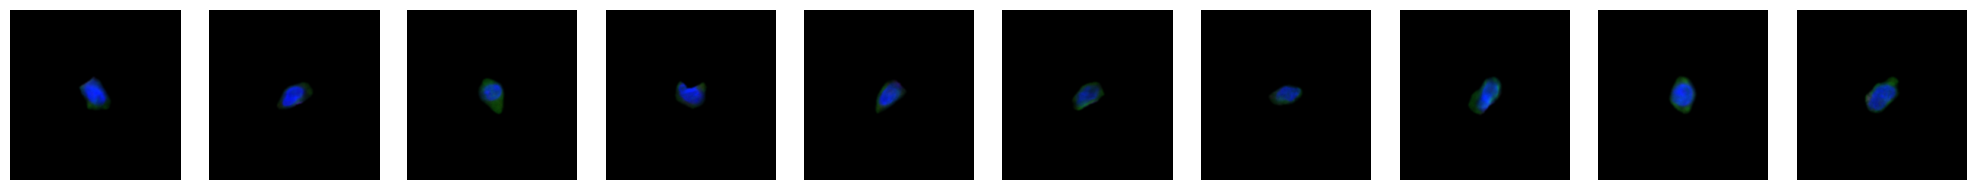

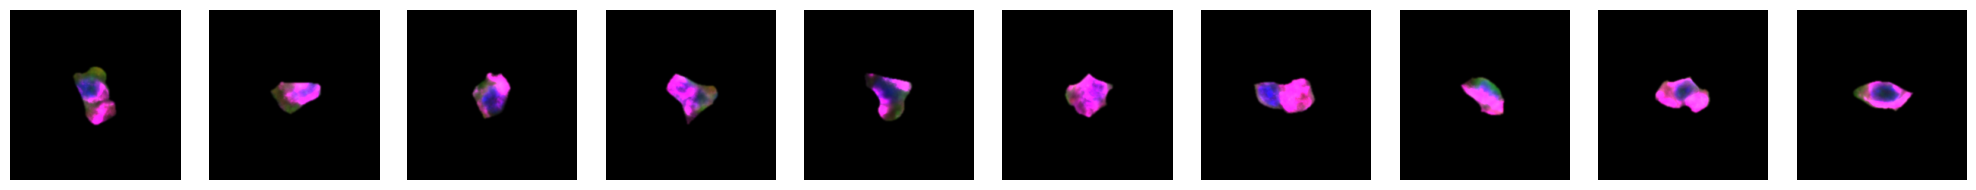

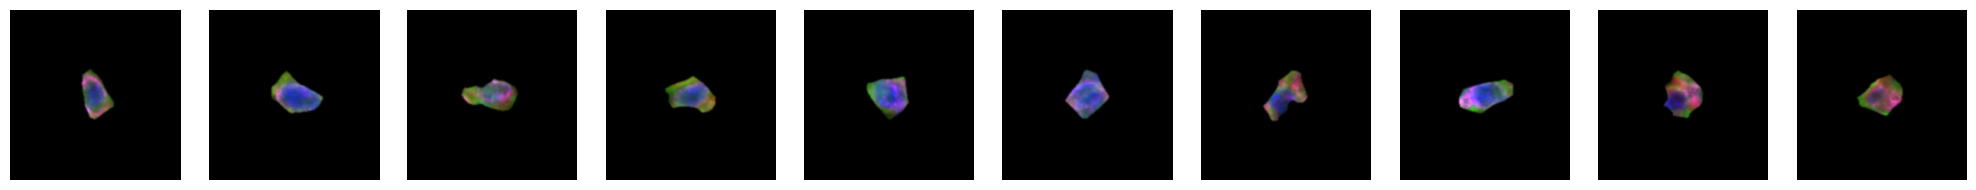

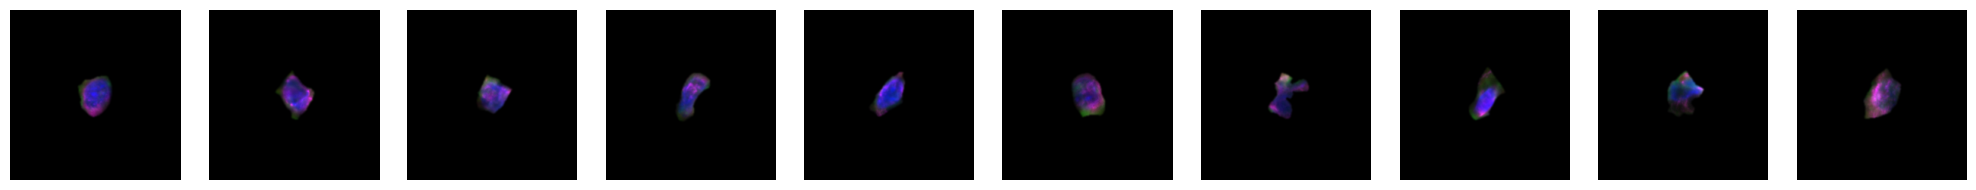

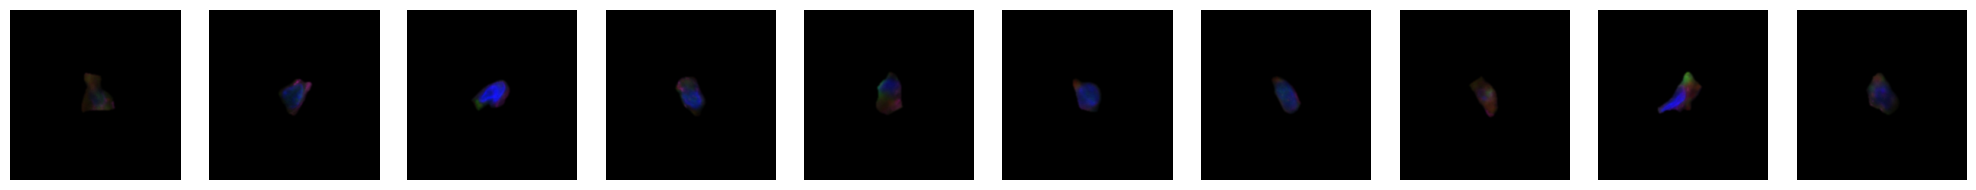

In [34]:
# visualize tsne plot to add red labels indicating where cells were sampled from
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
axs.scatter(annotation_macrophages.tsne_x, 
            annotation_macrophages.tsne_y, 
            c = annotation_macrophages.vitmae_leiden_macs.astype("int"), 
            cmap = "tab20",
            s = 1)
axs.set_xlabel("tSNE 1")
axs.set_ylabel("tSNE 2")
axs.set_title("Centers around which individual cells were sampled for visualization")

# define location where for each cluster cells should be sampled from with a minimum distance to this point
centers = {
           "1": [42, -31],
           "2": [14, 0],
           "3": [-15, 25],
           "4": [-7,-22],
           "5": [-12, -3],
           "6": [3, 8],
           "7": [7, 0],
           "8": [27, -65],
           "9": [1, -18],
           "10": [7, 25],
           "11": [-15, -85],
           "12": [-70, 32],
           "13": [0, 24],
           "14": [2, -43],
           "15": [10, -13],
          }

# define number of cells to get for each cluster as well as the size of single-cell images to save to file
n_cells = 10
single_cell_size = 2

for cluster in annotation_macrophages["vitmae_leiden_macs"].unique():
    _subset = annotation_macrophages[annotation_macrophages["vitmae_leiden_macs"] == cluster]

    # get cells that have the smallest distance to x, y
    x, y = centers[cluster]
    coords = _subset[["tsne_x", "tsne_y"]].to_numpy()
    distances = np.linalg.norm(coords - np.array([x, y]), axis=1)
    distances = pd.DataFrame({"distance":distances, "scportrait_cell_id":_subset.scportrait_cell_id, "x":_subset.tsne_x, "y":_subset.tsne_y}).sort_values("distance")
    select_cells = distances.head(n_cells)

    # # visualize results
    axs.scatter(x, y, s = 10, color = "red")

    # get single cell images for selected cells
    cell_ids = select_cells.scportrait_cell_id
    channels = [1, 2, 3, 4]
    images = scportrait.tl.h5sc.get_image_with_cellid(h5sc, cell_id = cell_ids, select_channel = channels)

    fig_height = 1 * single_cell_size
    fig_width = n_cells * single_cell_size

    _fig, _ax = plt.subplots( 1, n_cells, figsize=(fig_width, fig_height))
    for _i, img in enumerate(images):
        _ax[_i].imshow(scportrait.pl.vis.generate_composite(img))
        _ax[_i].axis("off")

    _fig.tight_layout()
    _fig.savefig(f"{figures_directory}/Fig2h_single_cell_images_macrophage_cluster_{cluster}.pdf", bbox_inches = "tight")

## Fig 2h map macrophage leiden clusters into spatial context

In [35]:
color_map = "../figure_data/colormaps/Fig2f_cluster_to_color.json"
path_macrophage_leiden_cluster_annotation = '../figure_data/input_data_Xenium/macs_clusters.csv'

In [36]:
with open(color_map, "rb") as f:
    palette = json.load(f)

In [37]:
adata = sdata["table"].copy()

#add macrophage annotation
annotation_macrophages = pd.read_csv(path_macrophage_leiden_cluster_annotation)
annotation_macrophages.vitmae_leiden_macs = annotation_macrophages.vitmae_leiden_macs.astype('int').astype(str)
annotation_macrophages.vitmae_leiden_macs = annotation_macrophages.vitmae_leiden_macs.astype('category')

adata.obs = adata.obs.merge(annotation_macrophages, on = "cell_id", how = "left")
adata.obs.Has_DE_Genes = adata.obs.Has_DE_Genes.fillna(False)

sdata["table"].obs = adata.obs

annotation = sdata.table.copy()
annotation.uns["spatialdata_attrs"]["region"] = "centers_seg_all_cytosol"
annotation.obs["region"] = "centers_seg_all_cytosol"

sdata["table_centers"] = annotation

/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/1812646148.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata.obs.Has_DE_Genes = adata.obs.Has_DE_Genes.fillna(False)
/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/1812646148.py:13: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  annotation = sdata.table.copy()
/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


INFO     Rasterizing image for faster rendering.                                                                   
WARNING  One cmap was given for multiple channels and is now used for each channel. You're blending multiple cmaps.
         If the plot doesn't look like you expect, it might be because your cmaps go from a given color to 'white',
         and not to 'transparent'. Therefore, the 'white' of higher layers will overlay the lower layers. Consider 
         using 'palette' instead.                                                                                  


/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/sophia/Documents/GitHub/spatialdata-plot/src/spatialdata_plot/pl/basic.py:952: UserWarning: Annotating points with vitmae_leiden_macs which is stored in the table `table_centers`. To improve performance, it is advisable to store point annotations directly in the .parquet file.
  _render_points(
/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/sophia/mambaforge/envs/scPortrait/lib/python3.11/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table_centers` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/sophia/mambaforge/envs

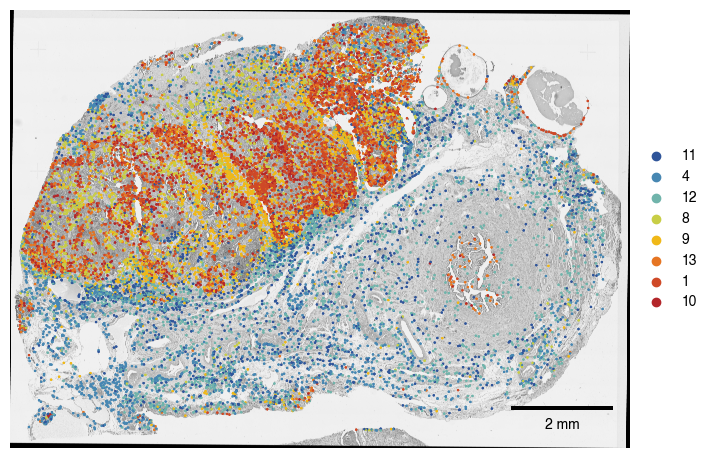

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


In [38]:
fig, axs = plt.subplots(1, 1, figsize = (8, 8))
sdata.pl.render_images('he_image',alpha = 1, cmap = "gray").pl.show(ax = axs)

# set up color scheme for points plot
groups = list(palette.keys())
colors = [to_hex(x) for x in list(palette.values())]

sdata.pl.render_points('centers_seg_all_cytosol', 
                       color = "vitmae_leiden_macs", 
                       groups = groups,
                       palette = colors,
                       size = 0.5,
                       method = "matplotlib").pl.show(ax = axs)

scportrait.pl.add_scalebar(axs, resolution = px_size, color = "black")

axs.axis("off")
axs.set_title(None)
plt.show()

fig.savefig(f"{figures_directory}/Fig2h_spatialplot_macrophage_clusters_overlayed_HE.pdf", bbox_inches = "tight")

## Fig 2i Differentially Expressed Genes between Macrophage Leiden Clusters

In [39]:
path_macrophage_leiden_cluster_annotation = '../figure_data/input_data_Xenium/macs_clusters.csv'
annotation = pd.read_csv(path_macrophage_leiden_cluster_annotation)


In [40]:
data_genes = data.copy()
data_genes.obs["vitmae_leiden_macs"] = data_genes.obs.get(["cell_id"]).merge(annotation, on = "cell_id", how = "outer")["vitmae_leiden_macs"].values.astype(int)
data_genes.obs["vitmae_leiden_macs"] = data_genes.obs["vitmae_leiden_macs"].astype("str").astype("category")
data_genes_macs = data_genes[data_genes.obs['cell_type'] == 'Macrophages'].copy()

/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/ipykernel_68593/496456935.py:2: RuntimeWarning: invalid value encountered in cast
  data_genes.obs["vitmae_leiden_macs"] = data_genes.obs.get(["cell_id"]).merge(annotation, on = "cell_id", how = "outer")["vitmae_leiden_macs"].values.astype(int)


In [41]:
sc.pp.normalize_total(data_genes_macs, target_sum=10e4)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


log1p is necessary here, because DE gene analysis is sensitive to high-variance outlier genes. In contrast to embedding into SCimilarity, the absolute range of values does not matter here.

In [42]:
sc.pp.log1p(data_genes_macs)

In [43]:
sc.pp.pca(data_genes_macs)

In [44]:
sc.tl.rank_genes_groups(
    data_genes_macs,
    groupby="vitmae_leiden_macs",
    method="wilcoxon"
)

In [45]:
sc.tl.dendrogram(
    data_genes_macs,
    groupby="vitmae_leiden_macs",
)

In [46]:
data_genes_macs.uns['rank_genes_groups']['pvals_adj']

rec.array([(0.00000000e+000, 4.15873330e-221, 4.03226695e-69, 2.32662628e-211, 3.63883912e-148, 1.81492466e-04, 1.86735412e-12, 1.08605089e-55, 2.69246116e-65, 9.14918466e-115, 1.40531723e-008, 1.34955430e-79, 1.54222695e-03, 3.86486992e-197, 1.63475088e-189),
           (0.00000000e+000, 1.21794059e-165, 3.25828886e-68, 3.71007546e-090, 6.79438975e-116, 8.81549171e-04, 3.94132129e-08, 1.73791410e-50, 8.03878116e-29, 1.39306302e-111, 3.86574021e-007, 6.00197915e-35, 6.59585970e-01, 5.27919959e-143, 9.81825848e-134),
           (1.88061565e-250, 2.84030000e-155, 5.51276828e-50, 1.10267730e-072, 1.09980395e-068, 8.81549171e-04, 5.96604964e-06, 1.62484802e-12, 1.90650312e-15, 7.17531186e-100, 2.44656736e-006, 3.22875313e-25, 1.00000000e+00, 4.05622143e-140, 2.80726986e-123),
           ...,
           (1.26089551e-035, 1.81027585e-034, 2.22470050e-20, 7.33432551e-125, 4.15634410e-056, 4.48155622e-11, 2.90315027e-18, 3.26019880e-19, 2.54428000e-30, 4.30726071e-067, 9.18172916e-056, 7.37589

categories: 1, 10, 11, etc.
var_group_labels: 11, 4, 12, etc.


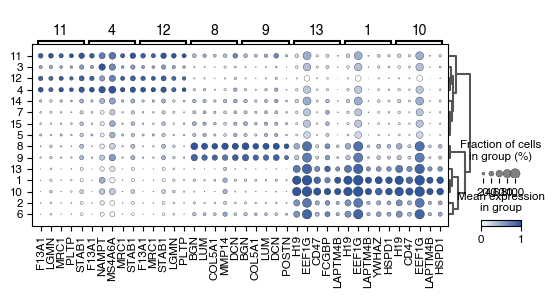

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


In [47]:
fig, ax = plt.subplots(figsize=(6.3, 2.8)) #8,3
dp = sc.pl.rank_genes_groups_dotplot(
    data_genes_macs,
    groupby="vitmae_leiden_macs",
    standard_scale="var",
    n_genes=5,
    cmap=custom_cmap_blue,
    ax=ax,
    min_logfoldchange=1.5,
    groups=groups_to_plot,
    dendrogram=True,
    return_fig=True,
)
dp.style(largest_dot=50)
dp.show()
fig.tight_layout()
fig.savefig(f'{figures_directory}/Fig_2i.pdf')